In [2]:
import torch

from PIL import Image
from Main import Main
from transformers import CLIPTokenizer
from Pipeline import Pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using device: mps


100%|██████████| 50/50 [01:31<00:00,  1.84s/it]


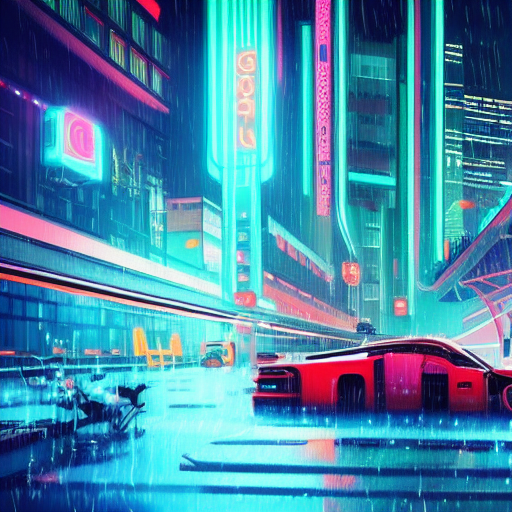

In [ ]:
ENABLE_CUDA = False
ENABLE_MPS = True

device = 'cpu'
if torch.cuda.is_available() and ENABLE_CUDA:
    device = 'cuda'
elif (torch.backends.mps.is_available() or torch.has_mps) and ENABLE_MPS:
    device = 'mps'

print(f'using device: {device}')

tokenizer = CLIPTokenizer('../data/tokenizer_vocab.json', '../data/tokenizer_merges.txt')
main = Main()
models = main.preload_models_from_std_weights('../data/v1-5-pruned-emaonly.ckpt', device)

# text-to-image
prompt = "Neon cyberpunk cityscape at night, vibrant colors, detailed, futuristic architecture, flying cars, rain-soaked streets, cinematic lighting"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7.5

# image-to-image
image = None
strength = 0.9
# image = Image('')

sampler = 'ddpm'
inference_steps = 50
seed = 42

output_img = Pipeline().generate(prompt,
                                 uncond_prompt,
                                 image,
                                 strength,
                                 do_cfg,
                                 cfg_scale,
                                 sampler,
                                 inference_steps,
                                 models,
                                 seed,
                                 device,
                                 'cpu',
                                 tokenizer)

Image.fromarray(output_img)